In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import mglearn

### 2.3.1 예제에 사용할 데이터셋

X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


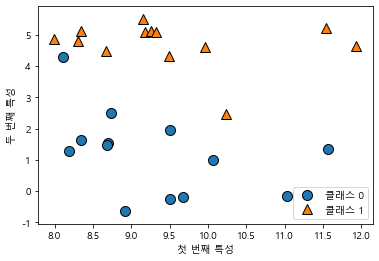

In [2]:
# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 마이너스 부호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 산점도 작성
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타겟')

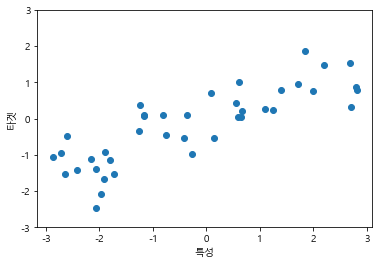

In [3]:
# wave 데이터셋 생성
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타겟")

In [4]:
# 유방암 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# 유방암 데이터셋의 형태
print("유방암 데이터셋의 형태:" ,cancer.data.shape)

유방암 데이터셋의 형태: (569, 30)


In [6]:
# 클래스별 샘플 개수 확인
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
# 특성 의미 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 2.3.2 k-최근접 이웃

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


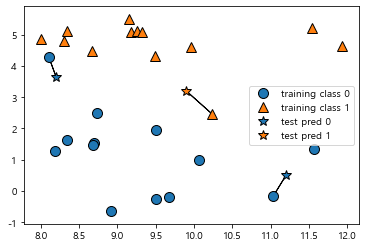

In [8]:
# 가장 간단한 k-NN으로 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용
# forge 데이터셋을 1-NN 으로 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


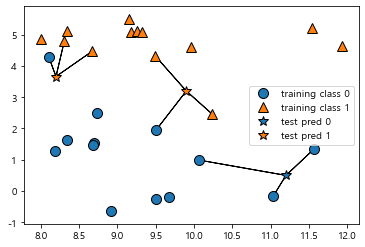

In [9]:
# forge 데이터셋을 3-NN 으로 분류
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
# KNeighborsClassifier 임포트 후 객체 생성하고 이웃 수 매개변수 지정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
# 훈련 세트로 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# 테스트 데이터에 대해 predict 메서드 호출로 예측
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [14]:
# 모델 평가
print("테스트 세트 정확도: {:.2f}" .format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


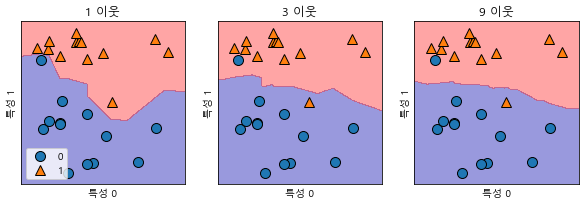

In [15]:
# xy 평면에 그려서 결정경계(decision boundary) 분석
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)  

이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아짐

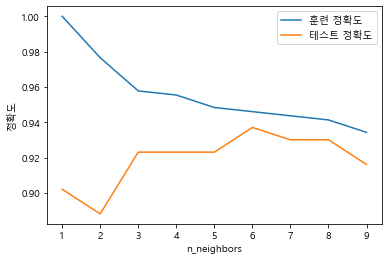

In [16]:
# 유방암 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neightbors 적용
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

이웃 수에 따른 훈련 세트와 데스트 세트 정확도 비교   
정확도가 가장 좋을 때는 중간 정도의 6개

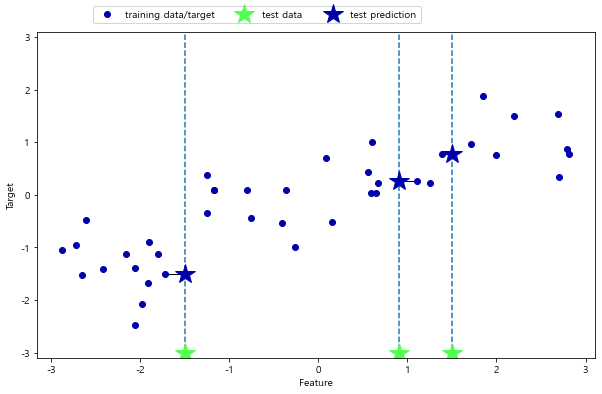

In [17]:
# wave 데이터셋 1-NN 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

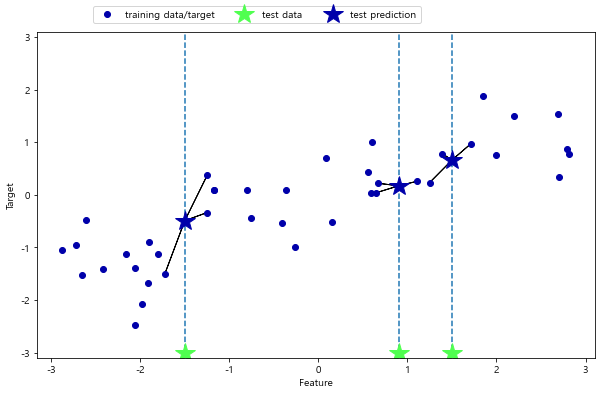

In [18]:
 # wave 데이터셋 3-NN 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
# 회귀를 위한 k-NN 알고리즘
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
# 결정계수 R^2 값 확인
print("테스트 세트 R^2: {:.2f}" .format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


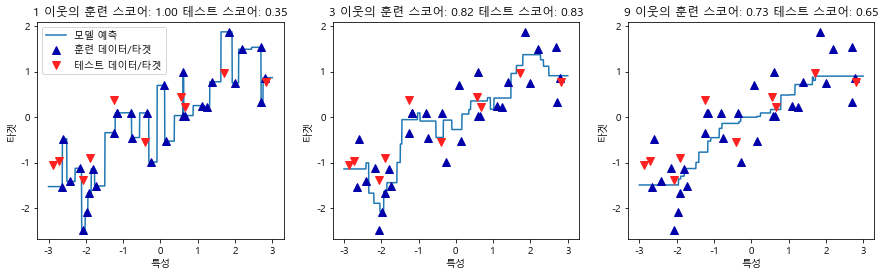

In [22]:
# KNeighborsRegressor 분석
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}" .format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")
axes[0].legend(["모델 예측", "훈련 데이터/타겟", "테스트 데이터/타겟"], loc="best")  

1이웃일 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가서 불안정한 예측을 만들어 냄   
이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정적인 예측을 얻을 수 있음

k-NN에서 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수   
실제로 이웃의 수는 3,5개 정도로 적을 때 잘 작동하지만 잘 조정해야 한다.   
   
k-NN의 장점은 이해하기 쉬운 모델이고 많이 조정하지 않아도 괜찮은 성능으로 더 복잡한 알고리즘 적용전에 시도해볼만한 시작점이다.   
모델은 빠르게 만들 수 있지만 훈련세트가 너무 크면 예측이 느려진다.   
k-NN 알고리즘을 사용할 땐 데이터 전처리 과정이 중요하다.   
수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않고 특성 값 데부분이 0인 데이터셋과는 특히 잘 작동하지 않는다.   